In [25]:
import pandas
from scipy.io import arff
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from dl85 import DL85Predictor
from dl85 import DL85Classifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import MyCode.utils as utils
import graphviz


In [26]:
pd.set_option('max_columns', None)
FILE_NAME = "relab_Lawsuit"

"""
dataset = np.genfromtxt("datasets/anneal.txt", delimiter=' ')
X, y = dataset[:, 1:], dataset[:, 0]

"""
col1        = np.array([0.0] * 10 + [1.0] * 0 + [0.0] * 0 + [1.0] * 10).reshape(-1,1)
col2        = np.array([0.0] * 5 + [1.0] * 5 + [0.0] * 5 + [1.0] * 5).reshape(-1,1)
X           = np.array([0.0] * 10 + [1.0] * 0 + [0.0] * 0 + [1.0] * 10)
X           = np.concatenate( (col1, col2), axis = 1)

y           = np.array([0.0] * 8 + [1.0] * 2 + [0.0] * 2 + [1.0] * 8)
sensitive   = np.array([0.0] * 6 + [1.0] * 5 + [0.0] * 7 + [1.0] * 2)
#X_train,y_train = X, y

#DATAFRAME
df = pd.DataFrame(X)
df['Class'] = y.tolist()
df['Sensitive'] = sensitive.tolist()
df

,0,1,Class,Sensitive
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,1.0
7,0.0,1.0,0.0,1.0
8,0.0,1.0,1.0,1.0
9,0.0,1.0,1.0,1.0


In [27]:
X = df.loc[:, ~df.columns.isin(['Class', 'Sensitive'])]
y = df['Class']
sensitive = df['Sensitive']

In [28]:
X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = utils.train_test_split(1, X, y, sensitive)

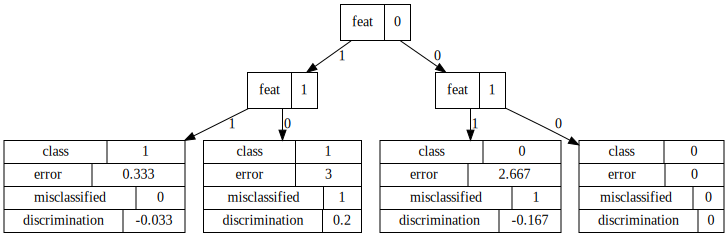

In [29]:
clf = DL85Classifier(max_depth=3, error_function=lambda tids: utils.error(list(tids), 10, y_train, sensitive_train), min_sup=1, time_limit=600)
clf = DL85Classifier(max_depth=3, error_function=lambda tids: utils.misclassified(list(tids), y), min_sup=1, time_limit=600)
clf.fit(X_train, list(y_train))
utils.tree_upgrade(clf.tree_, y_train, sensitive_train)

dot = utils.export_graphviz(clf)
graph = graphviz.Source(dot, format="png")
graph.render("plots/"+FILE_NAME+"tree")
graphviz.Source(dot)

In [30]:
y_pred_train = clf.predict(X_train)
discrimation_train = round(utils.discrimination(y_pred_train, sensitive_train), 4)
print("Discrimination of classifier on train", round(utils.discrimination(sensitive_train, y_pred_train), 4))

Discrimination of classifier on train 0.0


In [31]:
from pprint import pprint

#pprint(clf.tree_)

In [32]:
result2 = pd.DataFrame(X_train, columns = X.columns)
result2["Class"] = y_train
result2["Sensitive"] = sensitive_train
result2["Pred"] = y_pred_train

In [33]:
result2

,0,1,Class,Sensitive,Pred
0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0
5,0.0,1.0,0.0,1.0,0
6,0.0,1.0,0.0,1.0,0
7,0.0,1.0,1.0,1.0,0
8,1.0,0.0,0.0,1.0,1
9,1.0,0.0,1.0,0.0,1


In [34]:
def compute_disc_t(dataset):
    w2 = len(dataset[(dataset['Sensitive'] == 0) & (dataset['Class'] == 0) & (dataset['Pred'] == 1)])/len(dataset)
    x2 = len(dataset[(dataset['Sensitive'] == 0) & (dataset['Class'] == 1) & (dataset['Pred'] == 1)])/len(dataset)
    u2 = len(dataset[(dataset['Sensitive'] == 1) & (dataset['Class'] == 0) & (dataset['Pred'] == 1)])/len(dataset)
    v2 = len(dataset[(dataset['Sensitive'] == 1) & (dataset['Class'] == 1) & (dataset['Pred'] == 1)])/len(dataset)
    b       = len(dataset[(dataset['Sensitive'] == 1)  & (dataset['Class'] == 0)]) + len(dataset[(dataset['Sensitive'] == 1)  & (dataset['Class'] == 1)])/len(dataset)
    b_not   = len(dataset[(dataset['Sensitive'] == 0)  & (dataset['Class'] == 0)]) + len(dataset[(dataset['Sensitive'] == 0)  & (dataset['Class'] == 1)])/len(dataset)

    """
    w1 = len(dataset[(dataset['Sensitive'] == 0) & (dataset['Class'] == 0) & (dataset['Pred'] == 0)])/len(dataset)
    x1 = len(dataset[(dataset['Sensitive'] == 0) & (dataset['Class'] == 1) & (dataset['Pred'] == 0)])/len(dataset)
    u1 = len(dataset[(dataset['Sensitive'] == 1) & (dataset['Class'] == 0) & (dataset['Pred'] == 0)])/len(dataset)
    v1 = len(dataset[(dataset['Sensitive'] == 1) & (dataset['Class'] == 1) & (dataset['Pred'] == 0)])/len(dataset)
    print(w1+w2+x1+x2+u1+u2+v1+v2)
    """

    return ((w2+x2)/b_not) - ((u2+v2)/b)
compute_disc_t(result2)

0.0

In [35]:
utils.discrimination(y_pred_train, sensitive_train)

0.0

In [36]:
class Leaf:
    def __init__(self, path, u, v, w, x):
        self.path = path
        self.acc=None
        self.disc=None
        self.ratio=None
        self.u = u
        self.v = v
        self.w = w
        self.x = x

    def accuracy(self, n_one, n_zero):
        n = self.u + self.w
        p = self.v + self.x
        if n<=p :
            self.acc = n - p
            self.disc = (self.u+self.v)/n_one - (self.w+self.x)/n_zero
            self.ratio = self.disc/self.acc
        else:
            self.acc = p - n
            self.disc = -(self.u+self.v)/n_one + (self.w+self.x)/n_zero
            self.ratio = self.disc/self.acc

    def __str__(self):
        return f"Path: {self.path} \naccuracy: {self.acc} \ndisc: {self.disc} \nratio: {self.ratio} \ncontigency: \n{[self.u, self.v]}\n{[self.w, self.x]}"
    def __repr__(self):
        return f"{self.path}"

In [37]:
import copy

def relab1(tree, y, sensitive, n_zero, n_one, leafs, lenght, leaftuple= tuple()):
    if 'feat' in tree:
        tmp= leaftuple + ((tree['feat'], 'left'),)
        relab1(tree['left'], y, sensitive, n_zero, n_one, leafs, lenght, tmp)
        tmp= leaftuple + ((tree['feat'], 'right'),)
        relab1(tree['right'], y, sensitive, n_zero, n_one, leafs, lenght, tmp)
    else:
        tree["u"] = 0
        tree["v"] = 0
        tree["w"] = 0
        tree["x"] = 0
        for id in tree["transactions"]:
            if sensitive[id] == 1 and tree["value"] == 0:
                tree["u"] += 1
            if sensitive[id] == 1 and tree["value"] == 1:
                tree["v"] += 1
            if sensitive[id] == 0 and tree["value"] == 0:
                tree["w"] += 1
            if sensitive[id] == 0 and tree["value"] == 1:
                tree["x"] += 1
        n = (tree["u"]+tree["w"])
        p = (tree["v"]+tree["x"])
        if n<=p :
            tree["acc"] = n - p
            tree["disc"] = (tree["u"]+tree["v"])/n_one - (tree["w"]+tree["x"])/n_zero
        else:
            tree["acc"] = p - n
            tree["disc"] = -(tree["u"]+tree["v"])/n_one + (tree["w"]+tree["x"])/n_zero
        if tree["disc"] < 0:
            t = dict()
            t['tree'] = tree
            t['path'] = leaftuple
            leaf = Leaf(leaftuple, tree["u"]/lenght, tree["v"]/lenght, tree["w"]/lenght, tree["x"]/lenght)
            leaf.accuracy(n_one, n_zero)
            leafs.add(leaf)
cnt = np.unique(sensitive, return_counts=True)[1]


In [38]:
leafs = set()
relab1(clf.tree_, y_train, sensitive_train, cnt[0], cnt[1], leafs, len(y_train))
print(utils.sum_elem_tree(clf.tree_, "disc",  s=list(), bool=False))
pprint(clf.tree_)

0.8791208791208791
{'feat': 0,
 'left': {'feat': 1,
          'left': {'acc': -5,
                   'disc': 0.054945054945054916,
                   'discrimination_additive': -0.033333333333333326,
                   'error': 0.333333,
                   'misclassified': 0,
                   'proba': [0, 1.0],
                   'transactions': [11, 12, 13, 14, 15],
                   'u': 0,
                   'v': 2,
                   'value': 1,
                   'w': 0,
                   'x': 3},
          'proba': [0.125, 0.875],
          'right': {'acc': -3,
                    'disc': -0.010989010989011005,
                    'discrimination_additive': 0.2,
                    'error': 3.0,
                    'misclassified': 1,
                    'proba': [0.3333333333333333, 0.6666666666666666],
                    'transactions': [8, 9, 10],
                    'u': 0,
                    'v': 1,
                    'value': 1,
                    'w': 0,
          

In [39]:
for leaf in leafs:
    print(leaf)
    print()

Path: ((0, 'right'), (1, 'left')) 
accuracy: -0.1875 
disc: -0.026785714285714284 
ratio: 0.14285714285714285 
contigency: 
[0.1875, 0.0]
[0.0, 0.0]

Path: ((0, 'left'), (1, 'right')) 
accuracy: -0.1875 
disc: -0.0006868131868131878 
ratio: 0.0036630036630036686 
contigency: 
[0.0, 0.0625]
[0.0, 0.125]



In [40]:
disc_t = utils.discrimination(y_pred_train, sensitive_train)
disc_t = compute_disc_t(result2)
def rem_disc(L, e):
    s = 0
    for leaf in L:
        print(leaf.disc)
        if leaf.disc < e:
            s += leaf.disc
    return disc_t+s

def relab(leafs, e):
    I = list()
    for leaf in leafs:
        if leaf.disc < 0:
            I.append(leaf)
    L = set()
    print(rem_disc(L, e))
    while rem_disc(L, e) > e:
        best_l = I[0]
        for leaf in I:
            if leaf.ratio > best_l.ratio:
                best_l = leaf
        L.add(best_l)
        I.remove(best_l)
        leafs.remove(best_l)
        print(rem_disc(L, e))
    return L
relab(leafs, 1)

0.0


set()

In [41]:
l = Leaf(None, 1/20, 1/20, 1/20, 0)
l.accuracy(1/2,1/2)
print(l)

Path: None 
accuracy: -0.05 
disc: -0.1 
ratio: 2.0 
contigency: 
[0.05, 0.05]
[0.05, 0]
